In [430]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%matplotlib inline

In [431]:
# index_col parameter required as the csv has an Id field that shouldn't be considered a feature 
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [432]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2>Remove outliners from home_prices_data_exploration notebook</h2>

In [433]:
train = train.drop([1299, 524,333])

In [434]:
#test = pd.read_csv('../data/test.csv', index_col='Id')

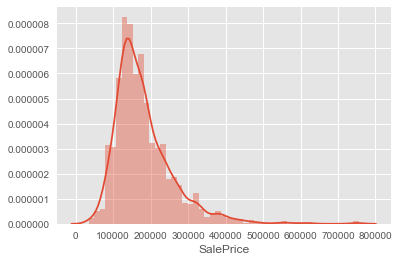

In [435]:
sns.distplot(train['SalePrice']);

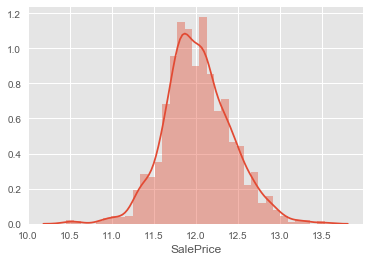

In [436]:
sns.distplot(np.log1p(train["SalePrice"]));

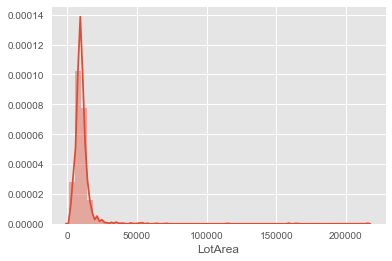

In [437]:
sns.distplot(train['LotArea']);

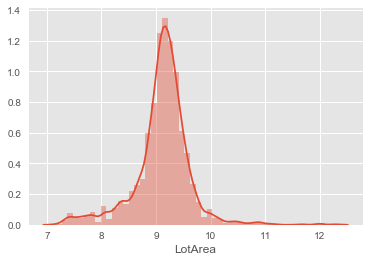

In [438]:
sns.distplot(np.log1p(train["LotArea"]));

In [439]:
def preparaData(data):
    #numeric features:
    numeric_feats =data.dtypes[data.dtypes != "object"].index
    #log transform only numeric features:
    #skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
    #skewed_feats = skewed_feats[skewed_feats > 0.75]
    
    data[numeric_feats] = np.log1p(data[numeric_feats]) # log transform data
    
    data = pd.get_dummies(data,dummy_na=True) # One hot encode categorical data including encoding NAs
    
    data = data.fillna(all_data.mean()) #filling NA's with the mean of the column:
    
    return data

In [440]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [441]:
all_data[['MoSold', 'MSSubClass']] = all_data[['MoSold', 'MSSubClass']].astype('object')

In [442]:
all_data = all_data.loc[:,'MSSubClass':'SaleCondition']
all_data = preparaData(all_data)
all_data[:10]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,5.017280,...,0,1,0,0,0,0,0,1,0,0
1,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,5.652489,...,0,1,0,0,0,0,0,1,0,0
2,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,6.075346,...,0,1,0,0,0,0,0,1,0,0
3,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,6.293419,...,0,1,0,1,0,0,0,0,0,0
4,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,6.196444,...,0,1,0,0,0,0,0,1,0,0
5,4.454347,9.555064,1.791759,1.791759,7.597898,7.598900,0.000000,6.597146,0.000000,4.174387,...,0,1,0,0,0,0,0,1,0,0
6,4.330733,9.218804,2.197225,1.791759,7.603399,7.603898,5.231109,7.222566,0.000000,5.762051,...,0,1,0,0,0,0,0,1,0,0
7,4.196010,9.247925,2.079442,1.945910,7.587817,7.587817,5.484797,6.756932,3.496508,5.379897,...,0,1,0,0,0,0,0,1,0,0
8,3.951244,8.719481,2.079442,1.791759,7.566311,7.576097,0.000000,0.000000,0.000000,6.859615,...,0,1,0,1,0,0,0,0,0,0
9,3.931826,8.912069,1.791759,1.945910,7.570443,7.576097,0.000000,6.747587,0.000000,4.948760,...,0,1,0,0,0,0,0,1,0,0


In [443]:
all_training_data = all_data[:train.shape[0]]
all_testing_data = all_data[train.shape[0]:]
all_training_label = np.log1p(train["SalePrice"])

In [444]:
print(len(all_training_data))
print(len(all_testing_data))

1457
1459


In [558]:
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(all_training_data, all_training_label, test_size=0.1,random_state=2)

In [559]:
features_train[:10]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
997,4.196010,9.368881,1.945910,1.945910,7.586296,7.586296,6.349139,0.000000,0.000000,7.274480,...,0,1,0,0,0,0,0,1,0,0
545,4.196010,9.535174,2.079442,1.791759,7.595387,7.595387,5.187386,6.910751,5.313206,0.000000,...,0,1,0,0,0,0,0,1,0,0
1102,4.262680,8.853808,1.791759,2.079442,7.581210,7.602401,3.828641,6.378426,0.000000,6.047372,...,0,1,0,0,0,0,1,0,0,0
465,4.196010,8.030410,2.079442,1.791759,7.603399,7.603399,2.944439,0.000000,0.000000,7.226936,...,0,1,0,0,0,0,0,1,0,0
230,4.304065,9.078065,1.945910,1.945910,7.580700,7.580700,5.398163,0.000000,0.000000,7.085901,...,0,1,0,0,0,0,0,1,0,0
851,4.196010,8.069968,2.197225,1.791759,7.602900,7.602900,3.713572,0.000000,0.000000,7.149917,...,0,1,0,0,0,0,0,1,0,0
1375,4.499810,9.304923,2.197225,1.791759,7.604894,7.604894,4.394449,0.000000,0.000000,7.360104,...,0,0,0,0,0,0,0,0,1,0
537,4.196010,9.452188,1.609438,1.791759,7.587311,7.587311,0.000000,6.398595,0.000000,5.579730,...,0,0,0,0,0,0,0,1,0,0
356,4.196010,9.132271,1.945910,1.945910,7.597396,7.597396,4.672829,6.329721,0.000000,6.395262,...,0,1,0,0,0,0,0,1,0,0
1282,4.127134,9.082621,1.791759,2.079442,7.589842,7.605392,0.000000,6.278521,4.976734,5.899897,...,0,1,0,0,0,0,0,1,0,0


In [560]:
# Making sure our 2 converted columns are one-hot encoded
print(features_train.filter(like='MSSubClass').columns)
print(features_train.filter(like='MoSold').columns)

Index(['MSSubClass_20.0', 'MSSubClass_30.0', 'MSSubClass_40.0',
       'MSSubClass_45.0', 'MSSubClass_50.0', 'MSSubClass_60.0',
       'MSSubClass_70.0', 'MSSubClass_75.0', 'MSSubClass_80.0',
       'MSSubClass_85.0', 'MSSubClass_90.0', 'MSSubClass_120.0',
       'MSSubClass_150.0', 'MSSubClass_160.0', 'MSSubClass_180.0',
       'MSSubClass_190.0', 'MSSubClass_nan'],
      dtype='object')
Index(['MoSold_1.0', 'MoSold_2.0', 'MoSold_3.0', 'MoSold_4.0', 'MoSold_5.0',
       'MoSold_6.0', 'MoSold_7.0', 'MoSold_8.0', 'MoSold_9.0', 'MoSold_10.0',
       'MoSold_11.0', 'MoSold_12.0', 'MoSold_nan'],
      dtype='object')


In [561]:
def drawPredictionAgainstReality(pred,reality):
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10) 

    fig, ax = plt.subplots(figsize=(5, 5))

    plt.style.use('ggplot')
    plt.plot(pred, reality, 'ro')
    plt.xlabel('Predictions', fontsize = 10)
    plt.ylabel('Reality', fontsize = 10)
    plt.title('Predictions x Reality on dataset Test', fontsize = 15)
    ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
    plt.show()

In [562]:
from IPython.display import FileLink, FileLinks
def generateOutputFile(preds,fileName):
    print(len(test.index))
    print(len(preds))
    my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': preds})
    my_submission.to_csv("../submissions/" + fileName, index=False)
    FileLink("../submissions/" + fileName)

<b>Param Tuning for Regularization techniques like Lasso, Ridge ElasticNet </b>
<p>We will try to find optimal params for Ridge Lasso regression models using GridSearchCV,RidgeCV,LassoCV </p>

In [563]:
from sklearn.model_selection import GridSearchCV

8
0.9415006351778011


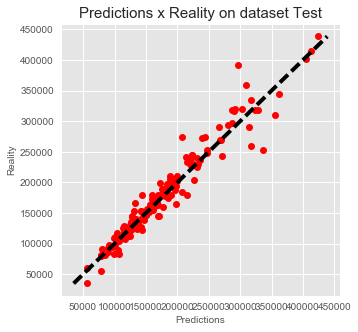

In [564]:
# Ridge Regulization
from sklearn.linear_model import Ridge
model = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 4.9,5,5.1,5.2,5.3,6,6.1,7,8,10, 15, 30, 50, 75]

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),cv=5)
grid.fit(all_training_data, all_training_label)

# summarize the results of the grid search
print(grid.best_estimator_.alpha)
print(grid.score(features_test, labels_test))
ridge_preds = np.expm1(grid.predict(features_test))

drawPredictionAgainstReality(ridge_preds,np.expm1(labels_test))

0.0006
cyclic
100
0.91272522057246


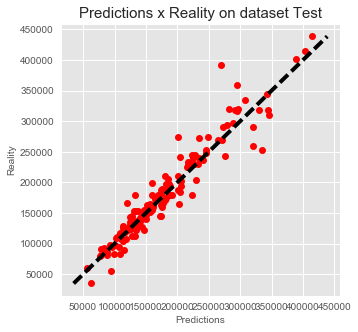

1459
1459


In [565]:
# Lasso Model
from sklearn.linear_model import Lasso
model = Lasso()
alphas = [0.0001,0.0002,0.0003,0.00033,0.0004,0.00041,0.0006,0.0007,0.0008,0.0009,0.001]
#selections = ["cyclic","random"]
max_iters = [10, 100, 200, 300, 700]

gridlasso = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas,max_iter=max_iters),cv=3)

gridlasso.fit(features_train, labels_train)

# summarize the results of the grid search
print(gridlasso.best_estimator_.alpha)
print(gridlasso.best_estimator_.selection)
print(gridlasso.best_estimator_.max_iter)
print(gridlasso.score(features_test, labels_test))

lasso_preds = np.expm1(gridlasso.predict(features_test))

drawPredictionAgainstReality(lasso_preds,np.expm1(labels_test))

lasso_test_preds = np.expm1(gridlasso.predict(all_testing_data))
#print(len(lasso_test_preds))
generateOutputFile(lasso_test_preds,"lasso_with_param_optimized.csv")

<b>Models</b>
<p>Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par</p>

In [566]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, features_train, labels_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [567]:
model_ridge = Ridge()

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [568]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

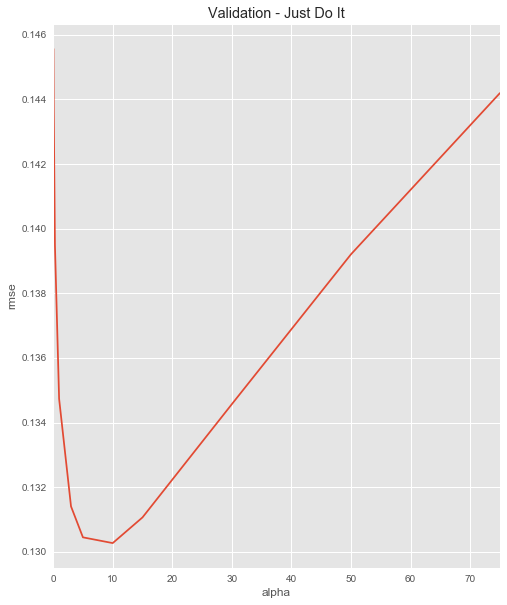

In [569]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot above.


In [570]:
cv_ridge.min()

0.13027104485311264

In [571]:
model_ridge.fit(features_train, labels_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [572]:
model_ridge.score(features_test, labels_test)

0.9085560648181835

So for the Ridge regression we get a rmsle of about 0.127

Let' try out the Lasso model. We will do a slightly different approach here and use the built in Lasso CV to figure out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.

In [573]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [574]:
rmse_cv(model_lasso).mean()

0.1261671318749573

In [575]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 110 variables and eliminated the other 178 variables


Good job Lasso. One thing to note here however is that the features selected are not necessarily the "correct" ones - especially since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on boostrapped samples and see how stable the feature selection is.

We can also take a look directly at what the most important coefficients are:

In [576]:
# most positive & negative coeffs
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

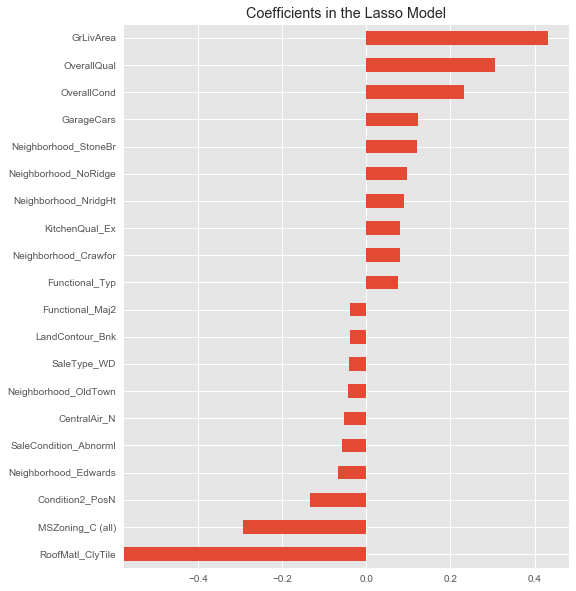

In [577]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

The most important positive feature is GrLivArea - the above ground area by area square feet. This definitely sense. Then a few other location and quality features contributed positively. Some of the negative features make less sense and would be worth looking into more - it seems like they might come from unbalanced categorical variables.

Also note that unlike the feature importance you'd get from a random forest these are actual coefficients in your model - so you can say precisely why the predicted price is what it is. The only issue here is that we log_transformed both the target and the numeric features so the actual magnitudes are a bit hard to interpret.

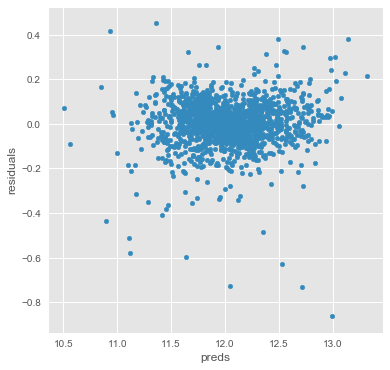

In [578]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

<b> Tune xdb model using GridCV</b>

In [579]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm

param_test1 = {'n_estimators':range(20,81,10)} # tune best # of estimators
grid = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, cv=3)
grid.fit(features_train, labels_train)
print(grid.best_estimator_.n_estimators)
grid.score(features_test, labels_test)

80


0.8458295689494593

In [583]:
# tuning other params
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(10,100,10)}
grid2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2,cv=3)
grid2.fit(features_train, labels_train)
print(grid2.best_estimator_.max_depth)
print(grid2.best_estimator_.min_samples_split)
grid2.score(features_test, labels_test)

9
40


0.8917452132077702

In [584]:
param_test3 = {'max_features':range(7,20,2)}
grid3 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.04, n_estimators=320,max_depth=9, min_samples_split=40, subsample=0.85, random_state=10),
param_grid = param_test3,cv=3)
grid3.fit(features_train, labels_train)
print(grid3.best_estimator_.max_features)

grid3.score(features_test, labels_test)

13


0.9120427017988946

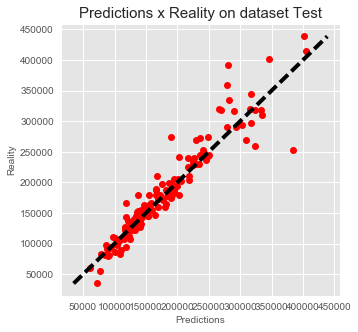

1459
1459


In [585]:
xdb_preds = np.expm1(grid3.predict(features_test))

drawPredictionAgainstReality(xdb_preds,np.expm1(labels_test))

xdb_test_preds = np.expm1(grid3.predict(all_testing_data))
#print(len(lasso_test_preds))
generateOutputFile(xdb_test_preds,"xdb_with_param_optimized.csv")

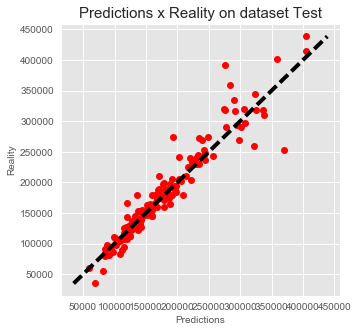

1459
1459


In [586]:
xdb_preds = 0.7*np.expm1(grid3.predict(features_test)) + 0.3*np.expm1(gridlasso.predict(features_test))

drawPredictionAgainstReality(xdb_preds,np.expm1(labels_test))

xdb_test_preds = np.expm1(0.7*grid3.predict(all_testing_data) + 0.3*gridlasso.predict(all_testing_data))
#print(len(lasso_test_preds))
generateOutputFile(xdb_test_preds,"xdb_lasso_with_param_optimized.csv")


In [511]:
#param_test4 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
#grid4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=80,max_depth=13,min_samples_split=60,random_state=10,max_features=9),
#param_grid = param_test4)
#grid4.fit(features_train, labels_train)
#print(grid4.best_estimator_.subsample)
#grid4.score(features_test, labels_test)

0.85


0.9294994856295499

<b>Adding an xgboost model:</b>
<p>Let's add an xgboost model to our linear model to see if we can improve our score:</p>

In [473]:
import xgboost as xgb

In [474]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

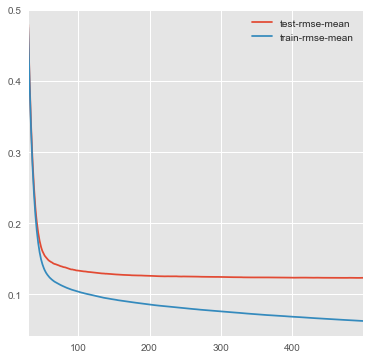

In [475]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [476]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [477]:
xgb_preds = np.expm1(model_xgb.predict(X_train))
lasso_preds = np.expm1(model_lasso.predict(X_train))

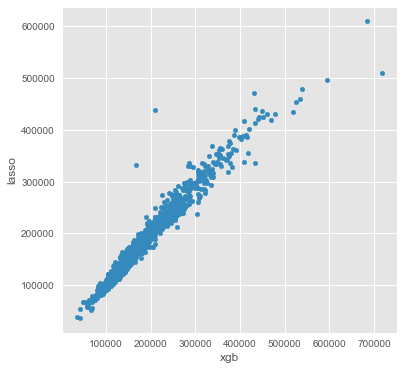

In [478]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [479]:
def drawPredictionAgainstReality(pred,reality):
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10) 

    fig, ax = plt.subplots(figsize=(5, 5))

    plt.style.use('ggplot')
    plt.plot(pred, reality, 'ro')
    plt.xlabel('Predictions', fontsize = 10)
    plt.ylabel('Reality', fontsize = 10)
    plt.title('Predictions x Reality on dataset Test', fontsize = 15)
    ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
    plt.show()

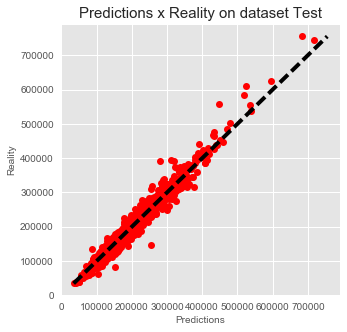

In [480]:
drawPredictionAgainstReality(xgb_preds,np.expm1(y))

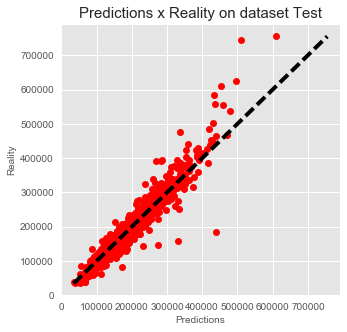

In [481]:
drawPredictionAgainstReality(lasso_preds,np.expm1(y))

Many times it makes sense to take a weighted average of uncorrelated results - this usually imporoves the score although in this case it doesn't help that much.

In [482]:
preds = 0.1*lasso_preds + 0.9*xgb_preds

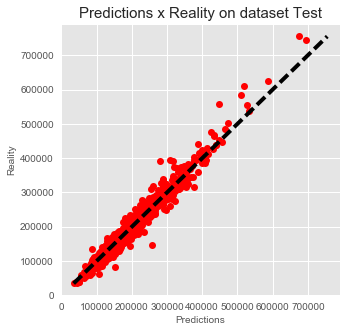

In [483]:
drawPredictionAgainstReality(preds,np.expm1(y))

In [484]:
test_xgb_preds = np.expm1(model_xgb.predict(X_test))

from IPython.display import FileLink, FileLinks
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': test_xgb_preds})
my_submission.to_csv('../submissions/xdb_sol.csv', index=False)
FileLink("../submissions/xdb_sol.csv")

/Users/rishikhanna/kaggle/House Prices/kaggle-homeprices/submissions/xdb_sol.csv